In [4]:
!kaggle datasets download -d zeesolver/credit-card/

 99%|███████████████████████████████████████▋| 142M/143M [00:07<00:00, 19.5MB/s]
100%|████████████████████████████████████████| 143M/143M [00:07<00:00, 19.3MB/s]


In [7]:
!unzip credit-card.zip -d data_input

Archive:  credit-card.zip
  inflating: data_input/creditcard_2023.csv  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data_input/creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [4]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df['Class'].unique()

array([0, 1])

In [6]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


/tmp/ipykernel_6291/2528562573.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax, color='r')


(50.01, 24039.93)

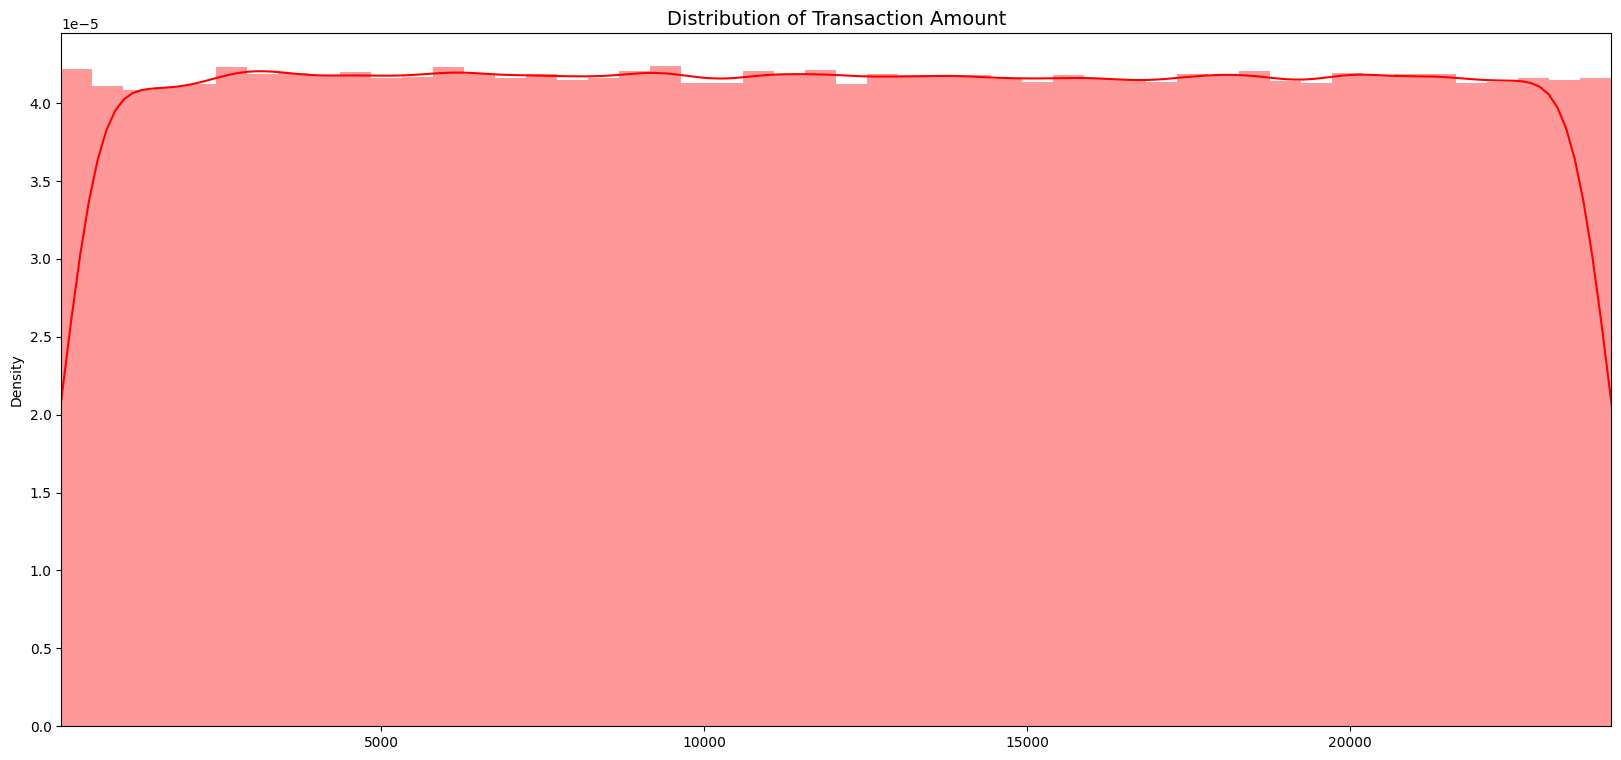

In [7]:
fig, ax = plt.subplots(figsize=(20,9))

amount_val = df['Amount'].values

sns.distplot(amount_val, ax=ax, color='r')
ax.set_title('Distribution of Transaction Amount', fontsize=14)
ax.set_xlim([min(amount_val), max(amount_val)])

# sns.distplot(amount_val, color='r')
# set_title('Distribution of Transaction Amount', fontsize=14)
# set_xlim([min(amount_val), max(amount_val)])

In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler

df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0,0.496764
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0,-0.458942
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0,-0.794279
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0,-0.554667
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0,0.187692


In [9]:
from sklearn.model_selection import KFold, StratifiedKFold

# X = df.drop(['Class', 'Amount'], axis=1)
X = df.drop('Class', axis=1)
y = df['Class']

gen = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
# gen = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)


for train_index, test_index in gen.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Turn into array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# cbeck if train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('-' * 100)
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

TRAIN: [     0      1      2 ... 568627 568628 568629] TEST: [     5      7      9 ... 568620 568625 568626]
TRAIN: [     0      3      4 ... 568627 568628 568629] TEST: [     1      2     13 ... 568588 568593 568598]
TRAIN: [     1      2      5 ... 568626 568627 568628] TEST: [     0      3      4 ... 568622 568623 568629]
TRAIN: [     0      1      2 ... 568626 568627 568629] TEST: [    14     19     27 ... 568619 568621 568628]
TRAIN: [     0      1      2 ... 568626 568628 568629] TEST: [    11     15     22 ... 568618 568624 568627]
----------------------------------------------------------------------------------------------------
[0.5 0.5]
[0.5 0.5]


In [10]:
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [11]:
# train test split
from sklearn.model_selection import train_test_split

X = df.drop(['id', 'Class'], axis=1)
y = df['Class']

scaler = StandardScaler()

X = scaler.fit_transform(X)


# Split into training and temp datasets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# Split into validation and test datasets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

input_dim = 30
output_dim = 1

model = Sequential()

# input layer and first hidden layer
model.add(Dense(64, activation='relu', input_shape = (input_dim,)))
model.add(Dense(32, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(output_dim, activation='sigmoid'))

# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))



Epoch 1/20
6220/6220 [==============================] - 3s 483us/step - loss: 0.0447 - accuracy: 0.9849 - val_loss: 0.0096 - val_accuracy: 0.9973
Epoch 2/20
6220/6220 [==============================] - 3s 477us/step - loss: 0.0100 - accuracy: 0.9975 - val_loss: 0.0059 - val_accuracy: 0.9985
Epoch 3/20
6220/6220 [==============================] - 3s 465us/step - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 4/20
6220/6220 [==============================] - 3s 465us/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 5/20
6220/6220 [==============================] - 3s 466us/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 0.0040 - val_accuracy: 0.9991
Epoch 6/20
6220/6220 [==============================] - 3s 466us/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 7/20
6220/6220 [==============================] - 3s 488us/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0027 -

In [15]:
def plot_acc_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

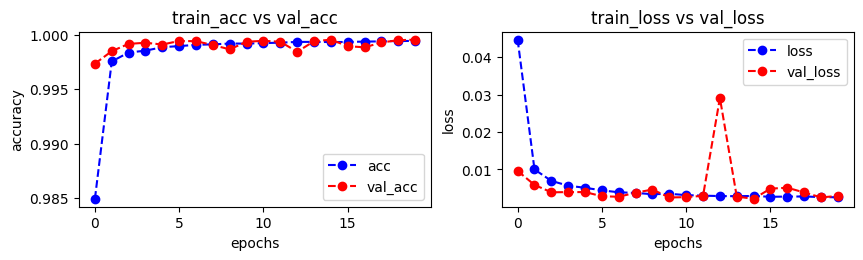

In [16]:
plot_acc_loss(history)

In [19]:
score_accuracy = model.evaluate(X_test, y_test, verbose=1)

2666/2666 [==============================] - 1s 317us/step - loss: 0.0023 - accuracy: 0.9996


In [13]:
print(X_train.shape)
print(X_val.shape)


(398041, 30)
(85295, 30)


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_pred = random_forest.predict(X_test)
score = random_forest.score(X_test, y_test)
score = round(score * 100, 2)
print(score)

100.0


In [25]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

In [26]:
score = f1_score(y_test, y_pred)
print(score)

0.9999529931605049


In [27]:
# confusion matrix for random forest
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[42745     4]
 [    0 42545]]


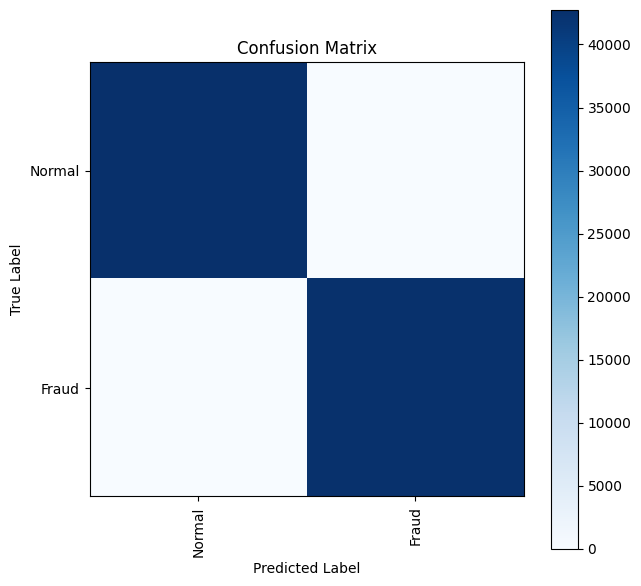

In [28]:
# confusion matrix graph
LABELS = ['Normal', 'Fraud']

confusion_mtx = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 7))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(LABELS))
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




In [32]:
# test using classification report
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
classification_report(y_test, y_pred.round(), target_names=LABELS)

   1/2666 [..............................] - ETA: 27s

2666/2666 [==============================] - 1s 262us/step


'              precision    recall  f1-score   support\n\n      Normal       1.00      1.00      1.00     42749\n       Fraud       1.00      1.00      1.00     42545\n\n    accuracy                           1.00     85294\n   macro avg       1.00      1.00      1.00     85294\nweighted avg       1.00      1.00      1.00     85294\n'